In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('survey_results_public.csv')

In [182]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [195]:
df = df[['Country','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [196]:
df = df[df['Salary'].notna()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [198]:
df = df.dropna()
df.isna().sum()


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47813 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47813 non-null  object 
 1   EdLevel       47813 non-null  object 
 2   YearsCodePro  47813 non-null  object 
 3   Employment    47813 non-null  object 
 4   Salary        47813 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [199]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [200]:
t = df['Country'].value_counts()
t
len(t)

165

In [201]:
def shorten_cat(categories,cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]

        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [202]:
country_map = shorten_cat(t,400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


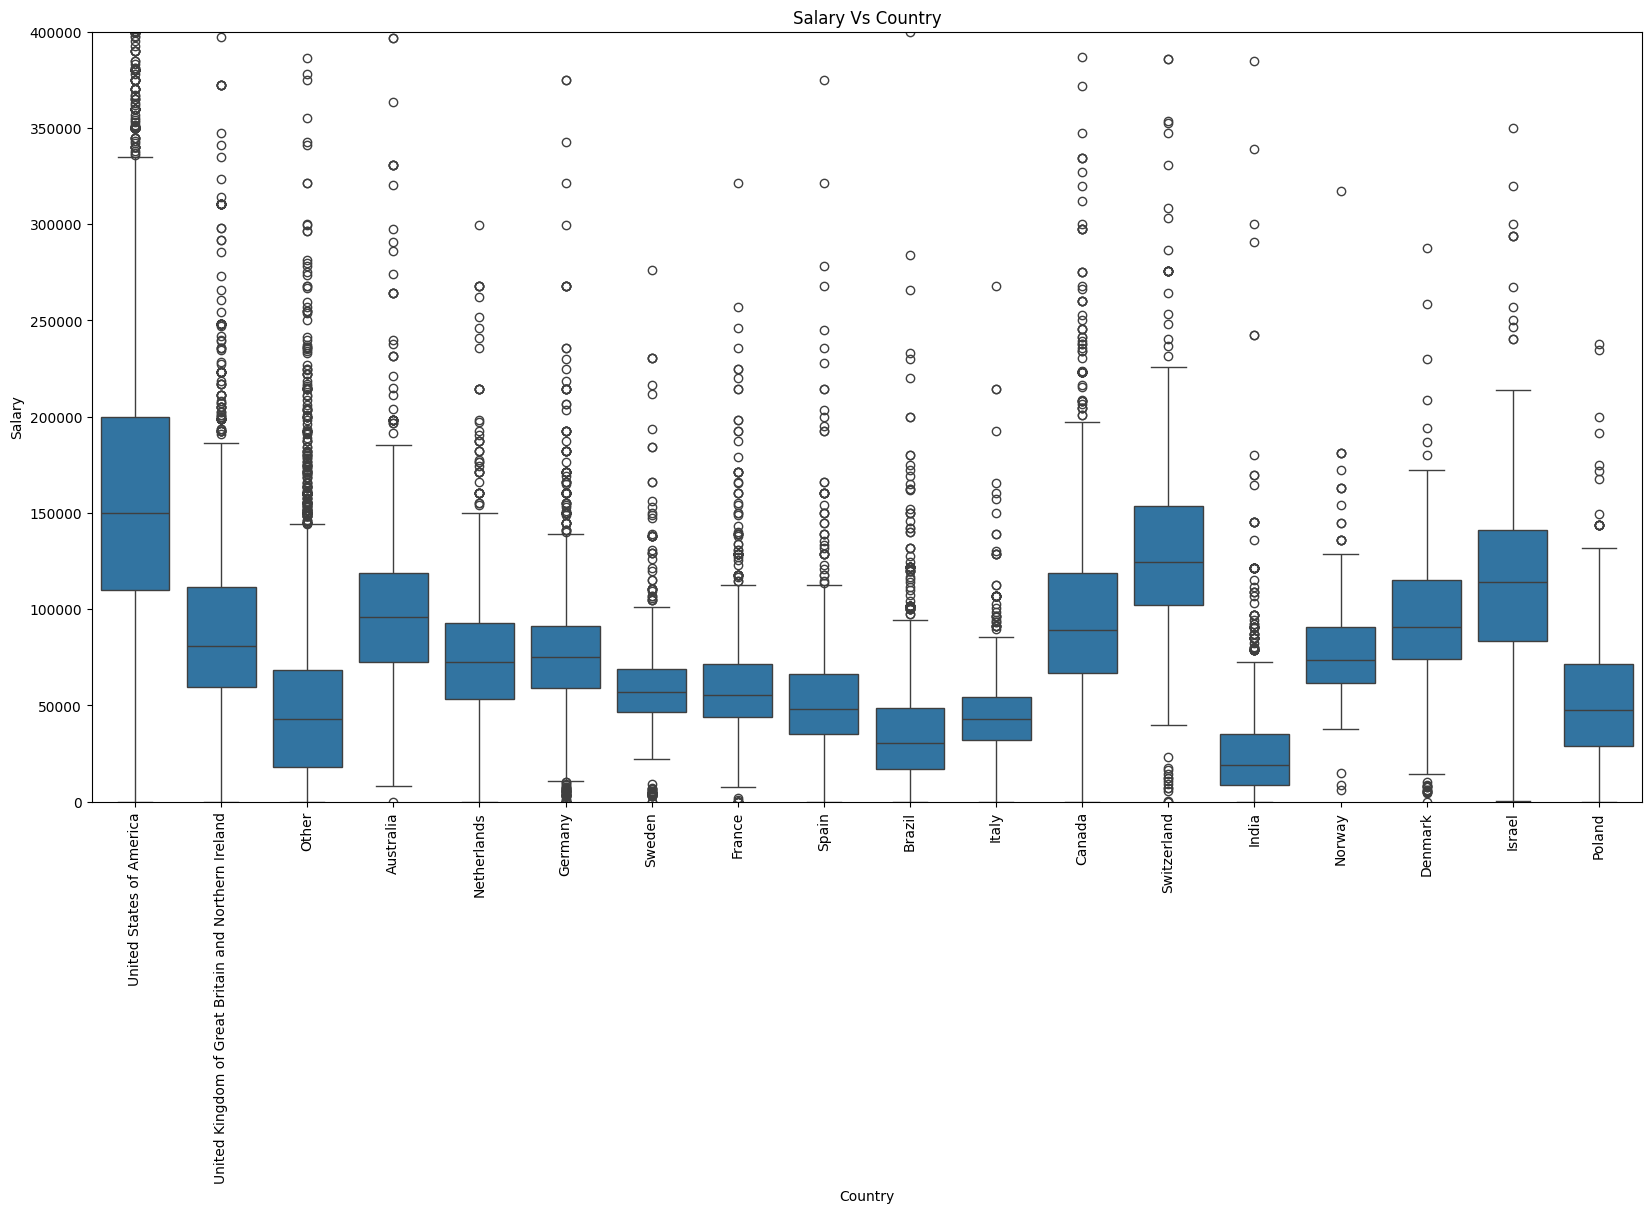

In [203]:
plt.figure(figsize=(20,10))

sns.boxplot(x='Country',y='Salary',data=df)
plt.title('Salary Vs Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.ylim(0,400000)

plt.show()

In [204]:
df = df[df['Salary']<= 250000]
df = df[df['Salary'] >10000]
df = df[df['Country'] != 'Other']


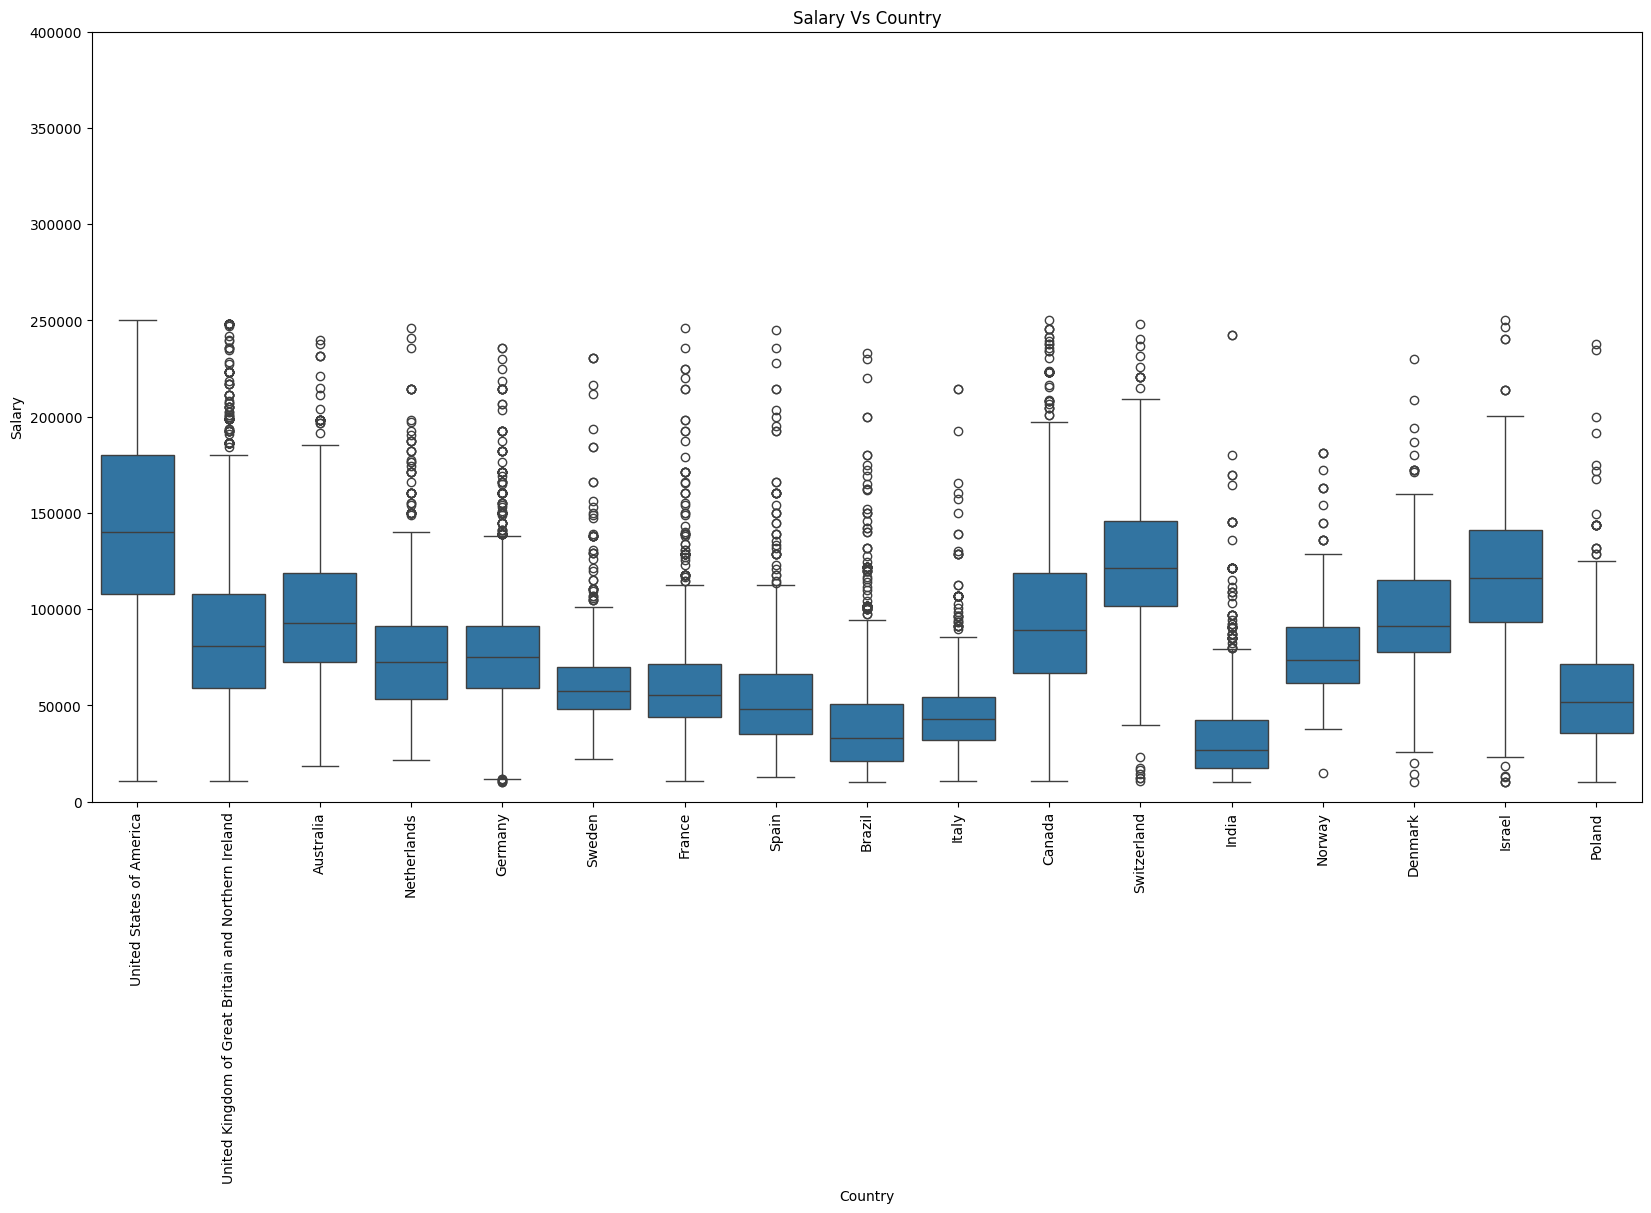

In [205]:
plt.figure(figsize=(20,10))

sns.boxplot(x='Country',y='Salary',data=df)
plt.title('Salary Vs Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.ylim(0,400000)

plt.show()

In [206]:
df['YearsCodePro'].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [207]:
def clean_expe(x):
    if x == 'More than 50 years':
        return 50.0
    if x == 'Less than 1 year':
        return 0.5
    
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_expe)

In [208]:
df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [209]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelors Degree'
    if 'Master’s degree' in x:
        return 'Masters Degree'
    if 'Professional degree' in x or 'Associate degree' in x:
        return 'Doctoral Degree'
    
    return 'Less than a Bachelor'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [210]:
df.EdLevel.unique()

array(['Bachelors Degree', 'Less than a Bachelor', 'Masters Degree',
       'Doctoral Degree'], dtype=object)

In [211]:
from sklearn.preprocessing import LabelEncoder

leedu = LabelEncoder()

df['EdLevel'] = leedu.fit_transform(df['EdLevel'])

In [212]:
lecount = LabelEncoder()

df['Country'] = lecount.fit_transform(df['Country'])

In [213]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,16,0,23.0,250000.0
3,16,0,7.0,156000.0
5,15,2,21.0,96828.0
6,16,2,3.0,135000.0
7,16,0,3.0,80000.0


In [214]:
df.Country.unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

In [215]:
X = df.drop('Salary',axis = 1)
y = df['Salary']

In [99]:
X

,Country,EdLevel,YearsCodePro
2,16,0,23.0
3,16,0,7.0
5,15,2,21.0
6,16,2,3.0
7,16,0,3.0
...,...,...,...
89156,16,0,8.0
89158,13,0,8.0
89162,1,3,24.0
89167,6,0,2.0


In [216]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [217]:
y_pred = linear_reg.predict(X)

In [218]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))
error

np.float64(46041.122030738254)

In [219]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [220]:
y_pred = dtr.predict(X)

In [221]:
error = np.sqrt(mean_squared_error(y,y_pred))
error

np.float64(33793.08971316332)

In [222]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [223]:
y_pred = rfr.predict(X)

In [224]:
error = np.sqrt(mean_squared_error(y,y_pred))
error

np.float64(33857.9622581597)

In [225]:
from sklearn.model_selection import GridSearchCV

max_depth = [None,2,4,6,8,10,12]

parameters = {'max_depth':max_depth}

regressor = DecisionTreeRegressor(random_state=0)

gs = GridSearchCV(regressor,parameters,scoring='neg_mean_squared_error')
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [226]:
regressor = gs.best_estimator_
regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
error


np.float64(34679.94442785627)

In [234]:
x = np.array([["India", "Bachelors Degree", 15]])


In [235]:
x[:,0] = x[:,0].astype(object)
x[:,1] = x[:,1].astype(object)

In [236]:
x[:,0] = lecount.transform(x[:,0])
x[:,1] = leedu.transform(x[:,1])



In [237]:
x = x.astype(float)

In [238]:
x

array([[ 6.,  0., 15.]])

In [239]:
y_pred = regressor.predict(x)
y_pred

d:\SD_Sal_Pred_WebAPP\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([66818.46938776])

In [240]:
import pickle

In [241]:
data = {"model":regressor,"le_country": lecount,"le_education":leedu}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [242]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

regressor_loaded = data['model']
le_count = data['le_country']
le_edu = data["le_education"]

In [243]:
y_pred = regressor_loaded.predict(x)
y_pred

d:\SD_Sal_Pred_WebAPP\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([66818.46938776])